In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np


In [3]:
pip install -U scikit-learn

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import preprocessing

In [47]:
#DL - Libraray
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [50]:
dir(Dense)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_autographed_call',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_dedup_weights',
 '_deferred_dependencies',
 '_dtype',
 '_eager_losses',
 '_flatten',
 '_flatten_layers',
 '_functional_construction_call',
 '_gather_children_attribute',
 '_gather_saveables_for_checkpoint',
 '_get_call_arg_value',
 '_g

In [11]:
# import the datasets 
path = 'D:/imarticus/Pythonlearn/car Price prediction END to End/car data.csv'

In [36]:
cars = pd.read_csv(path)

In [37]:
cars = cars.drop('Car_Name' , axis=1)

In [17]:
cars.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
cars_tr = cars.copy()
minmax = preprocessing.MinMaxScaler()

In [29]:
cars_tr.loc[:,cols] = minmax.fit_transform(cars.loc[:,cols])

In [30]:
cars_tr

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.733333,0.093123,0.057109,0.053053,Petrol,Dealer,Manual,0
1,0.666667,0.133238,0.099913,0.085085,Diesel,Dealer,Manual,0
2,0.933333,0.204871,0.103273,0.012813,Petrol,Dealer,Manual,0
3,0.533333,0.078797,0.041504,0.009409,Petrol,Dealer,Manual,0
4,0.733333,0.128940,0.070980,0.083984,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,0.866667,0.269341,0.122237,0.067043,Diesel,Dealer,Manual,0
297,0.800000,0.111748,0.060468,0.119119,Petrol,Dealer,Manual,0
298,0.400000,0.093123,0.115735,0.175043,Petrol,Dealer,Manual,0
299,0.933333,0.326648,0.131990,0.017017,Diesel,Dealer,Manual,0


In [39]:
cars_tr['Selling_Price'] = cars['Selling_Price']

In [27]:
cols = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']

In [42]:
#Building the model

trainx,testx,trainy,testy = train_test_split(cars_tr.drop('Selling_Price',axis=1),cars_tr['Selling_Price'] , test_size=0.25)

In [43]:
print(trainx.shape,testx.shape)

(225, 7) (76, 7)


In [53]:
#build the netwrok
#parameter 1 --> Nodes means  Unit (Numbers of nodes in layer)
#parametet 2 --> Shape=its a input shape
#parameter 3 --> learning Rate
def buildModel(units,shape,lr=0.001):
    # 1) Build the linear regression
    model = keras.Sequential([Dense(units,activation='relu',input_shape=[shape]),#Hidden layer 1(input)
                              Dense(units,activation='relu'),#hidden layer 2
                              Dense(1)])
    
    #2) set the learning rate
    optimizer = tf.keras.optimizers.RMSprop(lr)
    
    #3) complie the model
    
    model.compile(loss='mse' , optimizer = optimizer , metrics = ['mae' , 'mse'])
    
    #return the model
    
    return(model)

In [64]:
# Execute the function for out put
shape = trainx.shape[1]
units = pow(2,5)

In [65]:
m1 = buildModel(units=units , shape=shape)

In [66]:
# Summarize the model
m1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [84]:
EPOCHS = 2000

# Print the dot after 50th iteration this is to show the progress of model to get train
class printDot(keras.callbacks.Callback):
    def on_epoch_end(self , epoch , logs):
        if epoch % 50 == 0:
            print("." , end = " ")

In [62]:
trainx = trainx.drop(['Fuel_Type' , 'Seller_Type' , 'Transmission'] , axis = 1)

In [ ]:
, callbacks = [printDot()]

In [86]:
# train the Model
errors = m1.fit(trainx , trainy , epochs = EPOCHS , validation_split = 0.2 , verbose = 0, callbacks = [printDot()])

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [87]:
print(errors)

In [88]:
arrhit = errors.history

In [89]:
dd = pd.DataFrame(arrhit)

In [90]:
dd.columns

Index(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'], dtype='object')

In [91]:
dd

,loss,mae,mse,val_loss,val_mae,val_mse
0,49.430664,4.577034,49.430664,39.593262,4.145472,39.593262
1,47.935970,4.442642,47.935974,38.346786,4.026787,38.346786
2,46.468811,4.336078,46.468811,36.912594,3.909811,36.912594
3,44.912956,4.231719,44.912956,35.570900,3.802867,35.570900
4,43.350590,4.133373,43.350590,34.059845,3.678440,34.059845
...,...,...,...,...,...,...
1995,0.747513,0.564821,0.747513,0.708569,0.484252,0.708569
1996,0.717619,0.532399,0.717619,0.749830,0.456725,0.749830
1997,0.682641,0.524768,0.682641,0.706916,0.456315,0.706916
1998,0.792840,0.582169,0.792840,0.721947,0.587304,0.721947


In [92]:
dd['epoch'] = errors.epoch

In [93]:
dd

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,49.430664,4.577034,49.430664,39.593262,4.145472,39.593262,0
1,47.935970,4.442642,47.935974,38.346786,4.026787,38.346786,1
2,46.468811,4.336078,46.468811,36.912594,3.909811,36.912594,2
3,44.912956,4.231719,44.912956,35.570900,3.802867,35.570900,3
4,43.350590,4.133373,43.350590,34.059845,3.678440,34.059845,4
...,...,...,...,...,...,...,...
1995,0.747513,0.564821,0.747513,0.708569,0.484252,0.708569,1995
1996,0.717619,0.532399,0.717619,0.749830,0.456725,0.749830,1996
1997,0.682641,0.524768,0.682641,0.706916,0.456315,0.706916,1997
1998,0.792840,0.582169,0.792840,0.721947,0.587304,0.721947,1998


In [95]:
# pllot the errors for analysis
import matplotlib.pyplot as plt
import seaborn as sns

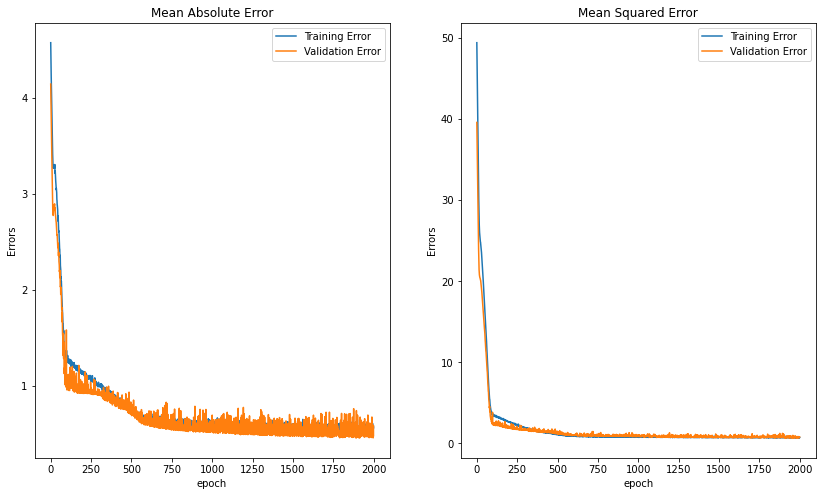

In [107]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.plot(dd.epoch , dd.mae , label='Training Error')
plt.plot(dd.epoch, dd.val_mae , label = 'Validation Error')
plt.xlabel('epoch')
plt.ylabel('Errors')
plt.title("Mean Absolute Error")
plt.legend()

plt.subplot(122)
plt.plot(dd.epoch , dd.mse , label='Training Error')
plt.plot(dd.epoch, dd.val_mse , label = 'Validation Error')
plt.xlabel('epoch')
plt.ylabel('Errors')
plt.title("Mean Squared Error")
plt.legend()

In [96]:
# Now predict the model
testx = testx.drop(['Fuel_Type' , 'Seller_Type' , 'Transmission'] , axis = 1)

In [97]:
p1 = m1.predict(testx).flatten()

In [98]:
# Store the prediction in dataframe
res = pd.DataFrame({'Actual':testy , 'Prediction':np.round(p1,1)})

In [99]:
# find fina; mse
from sklearn.metrics import mean_squared_error as ms

In [101]:
mse1 = ms(testy , p1)
mse1

0.5947344178968487